In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
X , y = fetch_openml('mnist_784',version=1 , return_X_y = True)

In [3]:
print(X.shape )  # 28*28
y.shape

(70000, 784)


(70000,)

<AxesSubplot:xlabel='class', ylabel='Count'>

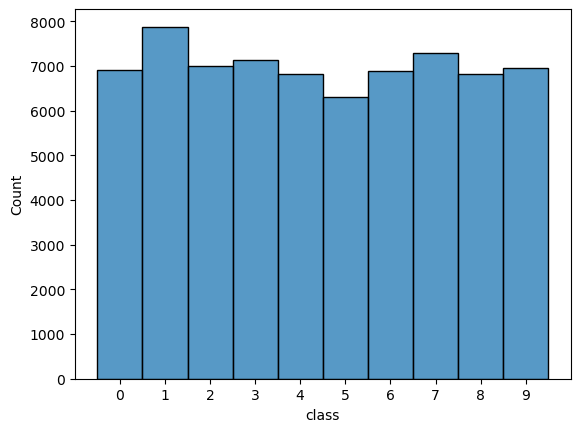

In [4]:
sns.histplot(y)


# To check the distribution of class label

Label :  5


Text(0.5, 1.0, 'Image')

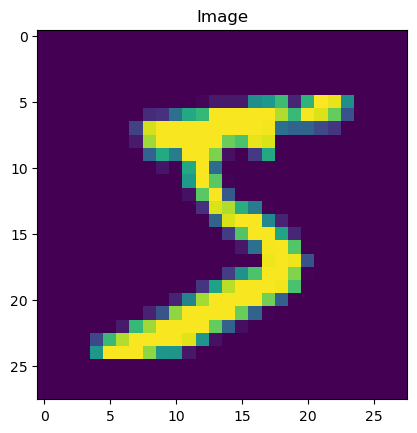

In [5]:
# To plot the image, we need to scale the data and reshape with 28*28
from sklearn.preprocessing import  MinMaxScaler
min_max_obj = MinMaxScaler()
new_X = min_max_obj.fit_transform(X)
print("Label : ",y[0])
plt.imshow(new_X[0].reshape(28,28))
plt.title("Image")

In [6]:
print("Total class labels : " ,y.nunique())
print("Class labels : " , y.unique())



Total class labels :  10
Class labels :  ['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


# Train the model - For Binary Classification

In [7]:
X_train , X_test , y_train , y_test = X.iloc[0:6000], X.iloc[6000:],y.iloc[0:6000],y.iloc[6000:]

In [8]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_train_transform = min_max.fit_transform(X_train)

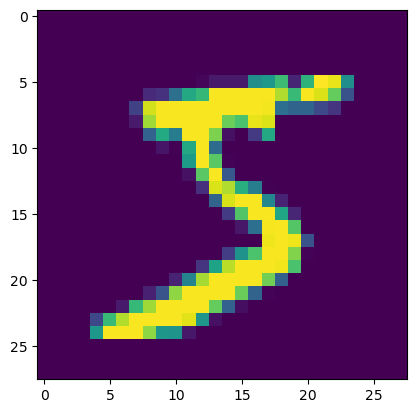

In [9]:
plt.imshow(X_train_transform[0].reshape(28,28))

In [10]:
y_train =  y_train.replace(['1','2','3','4','5','6','7','8','9'],-1).replace(['0'],1)
y_train.unique()

[-1, 1]
Categories (2, int64): [1, -1]

In [11]:
y_test =  y_test.replace(['1','2','3','4','5','6','7','8','9'],-1).replace(['0'],1)
y_test.unique()

[-1, 1]
Categories (2, int64): [1, -1]

In [12]:
from sklearn.linear_model import Perceptron

per_obj = Perceptron()
per_obj.fit(X_train, y_train)
per_obj.score(X_test,y_test)

0.979875

In [13]:
y_pred = per_obj.predict(X_test)

# Classification Metrics

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score,f1_score,roc_curve

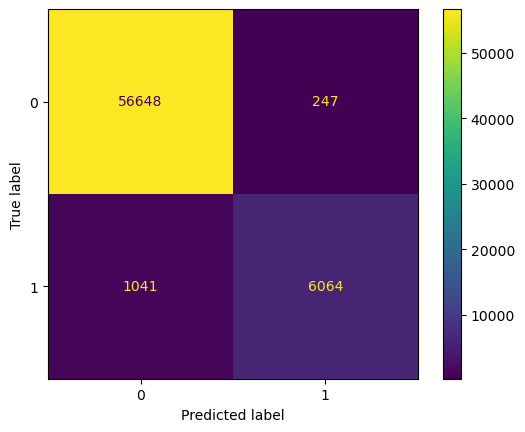

In [15]:
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [16]:
print("Precision")
print(precision_score(y_pred,y_test))

Precision
0.9608619870068135


In [17]:
print("Recall")
print(recall_score(y_pred,y_test))

Recall
0.8534834623504575


In [18]:
print("f1-score")
print(f1_score(y_pred,y_test))

f1-score
0.903995229576625
